# Data Scientist Associate Practical Exam Submission



# Data Quality

## Task 1 
The dataset contains **1500 rows** and **8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

1) **booking_id**: Same as description without missing values.
2) **months_as_member**: Same as description without missing values.
3) **weight**: 20 missing values, so I replaced missing values with the overall average weight.
4) **days_before**: I removed characters from the column. Also, I converted it to an 'int' type. Without missing values. 
5) **day_of_week**: I changed some of the names so that it is as instructed. Also, I converted it to a 'category' type. Without missing values.
6) **time**: I converted it to a 'category' type. Without missing values.
7) **category**: I replaced '-' values with 'unknown' since it didn't really reflect any category. There were 13 such values. I converted it to a 'category' type.
8) **attended**: Same as description without missing values.

After the data validation, the dataset contains **1500 rows** and **8 columns**.

### Original Dataset

In [1]:
# Data Validation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/fitness_class_2212.csv')
df.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
    booking_id  months_as_member  weight days_before day_of_week time  \
0            1                17   79.56           8         Wed   PM   
1            2                10   79.01           2         Mon   AM   
2            3                16   74.53          14         Sun   AM   
3            4                 5   86.12          10         Fri   AM

### After replacing missing values with the overall average weight in the 'weight' column

In [618]:
df['weight'] = df['weight'].fillna(df['weight'].mean())
df.info()
print('\n', df['weight'].min(), '- minimum value.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB

 55.41 - minimum value.


### After stripping some values and converting the data type in the 'days_before' column

In [619]:
df['days_before'] = df['days_before'].str.strip('days').astype('int')
df.info()
print('\n', df['days_before'].min(), '- minimum value.')
print('\n', df.head(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB

 1 - minimum value.

     booking_id  months_as_member  weight  days_before day_of_week time  \
0            1                17   79.56            8         Wed   PM   
1            2                10   79.01            2         Mon   AM   
2            3                16   74.53           14         Sun   AM   
3            4                 5   86.12  

### After changing some values and converting the data type in the 'day_of_week' column

In [620]:
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon')
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].astype('category')
df.info()
print('\n', df['day_of_week'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   object  
 6   category          1500 non-null   object  
 7   attended          1500 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 84.0+ KB

 ['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat']
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']


### After converting the data type in the 'time' column.

In [621]:
df['time'] = df['time'].astype('category')
df.info()
print('\n', df['time'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   object  
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 73.8+ KB

 ['PM', 'AM']
Categories (2, object): ['AM', 'PM']


### After replacing missing values with 'unknown' and converting the data type in the 'category' column

In [622]:
df['category'] = df['category'].str.replace('-', 'unknown').astype('category')
df.info()
print('\n', df['category'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB

 ['Strength', 'HIIT', 'Cycling', 'Yoga', 'unknown', 'Aqua']
Categories (6, object): ['Aqua', 'Cycling', 'HIIT', 'Strength', 'Yoga', 'unknown']


# Exploratory Analysis

From the **Graph 1** we see, that most of the people in the data did not attend the fitness classes. There are only 454 bookings who attended the classes. It is about 30% even across the categories. Therefore, the observations of the variable attended are balanced across categories and we can see it from the **Graph 2**.

From the **Graph 3** we can see that most of the people are members of the fitness club for a period from one month to around forty. We also have many outliers. There are 103 outliers. It is around 7% of all observations, which is significant. We are going to remove them so that our model is not affected so much. After we removed the outliers, we check the distribution of months as a member again to be sure that the outliers were removed (**Graph 3.1**).

We can see from the **Graph 4** that 'attended' observations have higher values. That means that they are members of the fitness class for a longer period of time. It is easier to see after we removed the outliers.

## Task 2

### Creating plots

1046 - not attended
454 - attended


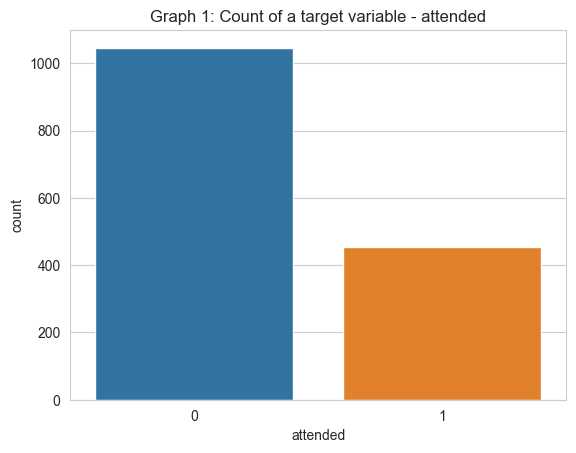

In [623]:
sns.set_style('whitegrid')
sns.countplot(x ='attended', data = df).set(title='Graph 1: Count of a target variable - attended');
print(len(df[df['attended'] == 0]), '- not attended')
print(len(df[df['attended'] == 1]), '- attended')

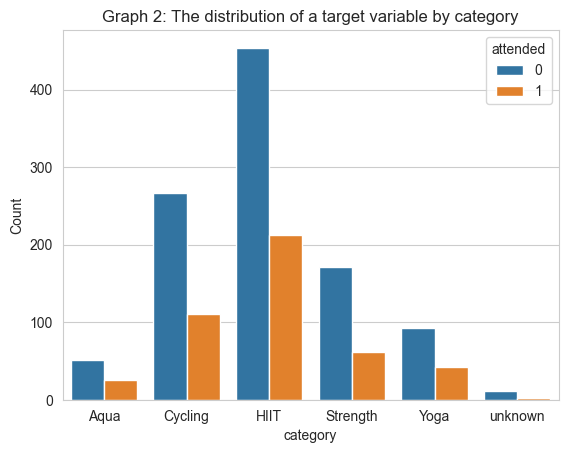

In [624]:
sns.countplot(data = df, x = 'category', hue = 'attended').set(title = 'Graph 2: The distribution of a target variable by category', xlabel = 'category', ylabel = 'Count');

## Task 3

### Creating a plot of the distribution of the months_as_member column

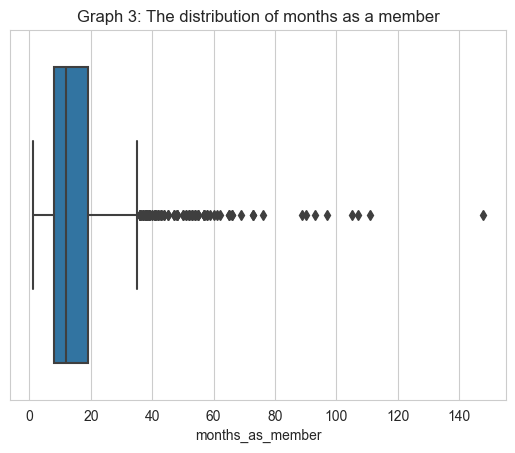

In [625]:
sns.set_style('whitegrid')
sns.boxplot(x = 'months_as_member', data = df).set(title='Graph 3: The distribution of months as a member');

### Finding and removing outliers

In [626]:
# we are going to see how many there are outliers in "months_as_member" variable
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers
 
# input data
outliers = detect_outlier(df['months_as_member'])
print("Outliers:", outliers)
print(len(outliers), "data points are outliers")
print("The percent of outliers: ", (len(outliers) / len(df['months_as_member']) * 100))

# we are going to remove the outliers and see what happens.
df = df[df.months_as_member.isin(outliers) == False]
print(df['months_as_member'].isin(outliers).any())

Outliers: [53, 73, 55, 54, 76, 62, 42, 105, 90, 60, 107, 52, 53, 37, 37, 38, 48, 51, 40, 89, 57, 36, 52, 38, 38, 44, 39, 41, 57, 36, 38, 47, 58, 36, 39, 66, 48, 73, 41, 45, 43, 61, 48, 38, 50, 40, 65, 55, 39, 50, 45, 38, 41, 36, 52, 39, 39, 36, 43, 97, 41, 36, 55, 37, 39, 57, 37, 39, 43, 66, 44, 37, 36, 39, 47, 65, 42, 38, 37, 59, 51, 38, 36, 38, 41, 93, 41, 43, 41, 38, 54, 42, 148, 58, 111, 48, 53, 57, 38, 39, 69, 42, 54]
103 data points are outliers
The percent of outliers:  6.866666666666667
False


### Checking outliers again

<class 'pandas.core.series.Series'>
Int64Index: 1397 entries, 0 to 1499
Series name: months_as_member
Non-Null Count  Dtype
--------------  -----
1397 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB
None


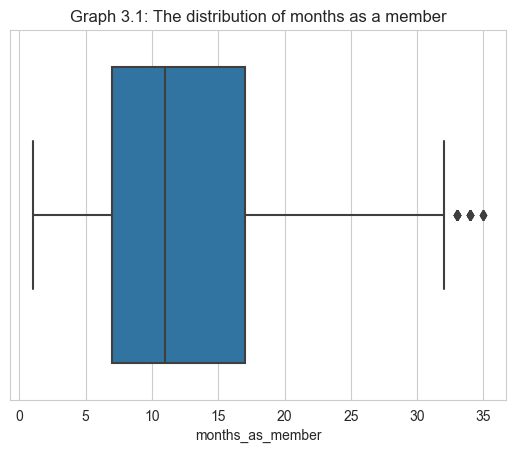

In [627]:
sns.set_style('whitegrid')
sns.boxplot(x = 'months_as_member', data = df).set(title='Graph 3.1: The distribution of months as a member');
print(df['months_as_member'].info())

Since the previous outliers were removed our observations are now more equally distributed.

## Task 4

### Looking at the relationship between two variables

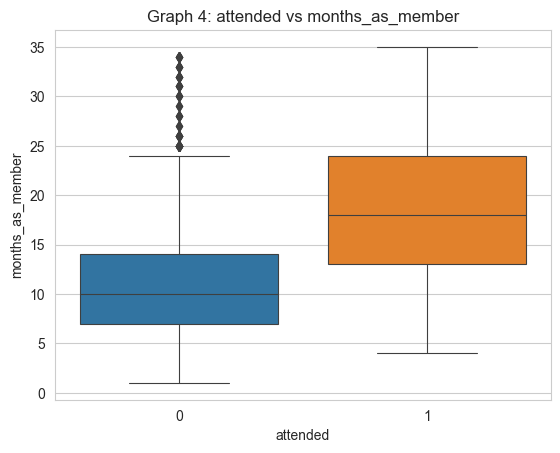

In [628]:
sns.set_style('whitegrid')
sns.boxplot(data=df, x='attended',y='months_as_member',linewidth=0.8).set(title='Graph 4: attended vs months_as_member');

# Model Fitting

### Making changes to enable modeling

First, I preapared the data for modeling. I dropped the column that won't be useful for us. Then I found out that this is a **classification** problem in machine learning. After that I chose the **Logistic Regression model** as a baseline model because it is very efficient to train and interpret. The comparison model I chose is the **Decision Tree model** because it works well with mixed data type and is relatively easy to explain to diverse audiences.

In [629]:
df = df.drop(columns=['booking_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   months_as_member  1397 non-null   int64   
 1   weight            1397 non-null   float64 
 2   days_before       1397 non-null   int64   
 3   day_of_week       1397 non-null   category
 4   time              1397 non-null   category
 5   category          1397 non-null   category
 6   attended          1397 non-null   int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 59.3 KB


In [630]:
from sklearn import preprocessing
features = df.drop(columns='attended')
X = pd.get_dummies(features, columns=['day_of_week','time','category'])
y = df['attended']

## Task 5
The business wants to predict whether members will attend using the data provided. That is a **classification** problem in machine learning.

In [631]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split dataset into 65% training set and 35% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)

## Task 6

### Fitting a baseline model

## Method #1 Logistic Regression Model

In [632]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)

## Task 7

### Fitting a comparison model

## Method #2 Decision Tree Model

In [633]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Task 8
I am choosing the **Logistic Regression model** as a baseline model because it is very efficient to train and interpret. The comparison model I am choosing is the **Decision Tree model** because it works well with mixed data type and is relatively easy to explain to diverse audiences.

# Model Evaluation

I am choosing **accuracy** to evaluate the model because it is easy to interpret. Accuracy focuses on correct predictions of all predictions.

The **accuracy** of the **Logistic Regression model** and **Decision Tree model** is **_0.79_** and **_0.71_**, meaning the **Logistic Regression model** predicts more correctly whether a member will attend a class or not.

From this metric, we can conclude that the **Logistic Regression model** has a higher chance of that prediction being correct.

## Task 9

## Evaluating the performance of the models

**Evaluating Logistic Regression Model**

In [634]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       367
           1       0.63      0.35      0.45       122

    accuracy                           0.79       489
   macro avg       0.72      0.64      0.66       489
weighted avg       0.77      0.79      0.76       489



**Evaluating Decision Tree Model**

In [635]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       367
           1       0.43      0.48      0.46       122

    accuracy                           0.71       489
   macro avg       0.63      0.64      0.63       489
weighted avg       0.72      0.71      0.72       489



## Task 10
The accuracy of the **Logistic Regression model** and **Decision Tree model** is _**0.79**_ and _**0.71**_. That means the **Logistic Regression model** predicts more correctly whether a person will attend a class or not since it has a higher accuracy.